# KNN no `chb10_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb10_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.900763,0.969466,0.984733,0.946565,0.847328,0.862595,0.908397,0.893130,0.748092,0.763359,0.870229,0.870229,0.786260,0.885496,0.946565,0.946565,0.732824,0.809160
1,0.893130,0.946565,0.969466,0.908397,0.786260,0.908397,0.877863,0.908397,0.786260,0.832061,0.862595,0.877863,0.801527,0.847328,0.923664,0.854962,0.740458,0.732824
2,0.908397,0.984733,0.984733,0.954198,0.854962,0.877863,0.900763,0.885496,0.786260,0.793893,0.877863,0.931298,0.786260,0.847328,0.885496,0.923664,0.793893,0.877863
3,0.916031,0.977099,0.992366,0.946565,0.839695,0.870229,0.877863,0.946565,0.702290,0.816794,0.916031,0.885496,0.793893,0.893130,0.893130,0.938931,0.763359,0.824427
4,0.900763,0.946565,0.954198,0.977099,0.824427,0.900763,0.900763,0.885496,0.786260,0.801527,0.893130,0.923664,0.748092,0.862595,0.908397,0.893130,0.702290,0.809160
5,0.916031,0.992366,0.984733,0.931298,0.809160,0.816794,0.885496,0.923664,0.786260,0.801527,0.893130,0.916031,0.748092,0.870229,0.946565,0.946565,0.748092,0.847328
6,0.877863,0.961832,0.984733,0.946565,0.824427,0.877863,0.916031,0.916031,0.793893,0.839695,0.870229,0.885496,0.770992,0.854962,0.916031,0.923664,0.809160,0.793893
7,0.931298,0.969466,0.992366,0.900763,0.786260,0.847328,0.870229,0.862595,0.763359,0.778626,0.832061,0.893130,0.687023,0.870229,0.916031,0.893130,0.740458,0.801527
8,0.893130,0.984733,0.984733,0.931298,0.816794,0.870229,0.916031,0.954198,0.778626,0.816794,0.870229,0.908397,0.793893,0.900763,0.946565,0.900763,0.755725,0.832061
9,0.923664,0.977099,0.992366,0.946565,0.755725,0.816794,0.885496,0.923664,0.755725,0.793893,0.908397,0.916031,0.702290,0.916031,0.954198,0.923664,0.748092,0.809160


,count,mean,std,min,25%,50%,75%,max
2,20.0,0.979389,0.009938,0.954198,0.969466,0.984733,0.984733,0.992366
1,20.0,0.966412,0.016127,0.923664,0.961832,0.969466,0.977099,0.992366
3,20.0,0.940458,0.019595,0.900763,0.929389,0.946565,0.946565,0.977099
14,20.0,0.911832,0.025436,0.877863,0.891221,0.912214,0.929389,0.954198
7,20.0,0.907634,0.025607,0.862595,0.885496,0.908397,0.923664,0.954198
0,20.0,0.903817,0.021363,0.862595,0.893130,0.904580,0.917939,0.938931
15,20.0,0.900382,0.033364,0.832061,0.870229,0.904580,0.923664,0.946565
6,20.0,0.896183,0.017928,0.854962,0.883588,0.900763,0.908397,0.923664
11,20.0,0.888168,0.028912,0.824427,0.870229,0.885496,0.910305,0.946565
10,20.0,0.883969,0.023312,0.832061,0.870229,0.877863,0.902672,0.916031


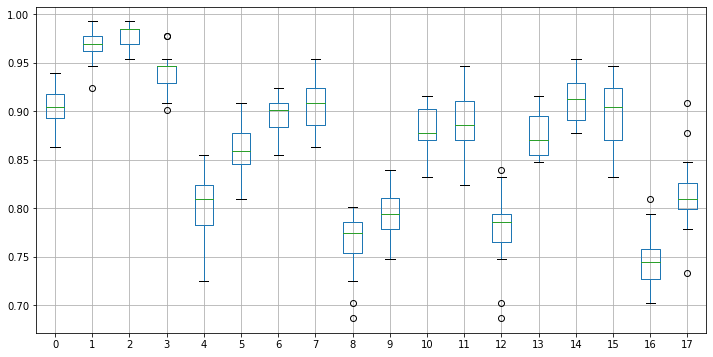

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '10'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.903817,0.021363,0.904580,10,0
1,0.966412,0.016127,0.969466,10,1
2,0.979389,0.009938,0.984733,10,2
3,0.940458,0.019595,0.946565,10,3
4,0.801527,0.033595,0.809160,10,4
5,0.858015,0.028390,0.858779,10,5
6,0.896183,0.017928,0.900763,10,6
7,0.907634,0.025607,0.908397,10,7
8,0.764122,0.030221,0.774809,10,8
9,0.794275,0.024073,0.793893,10,9
